In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read csv data file, change to your location
df = pd.read_csv("ex5Data/iris.csv")

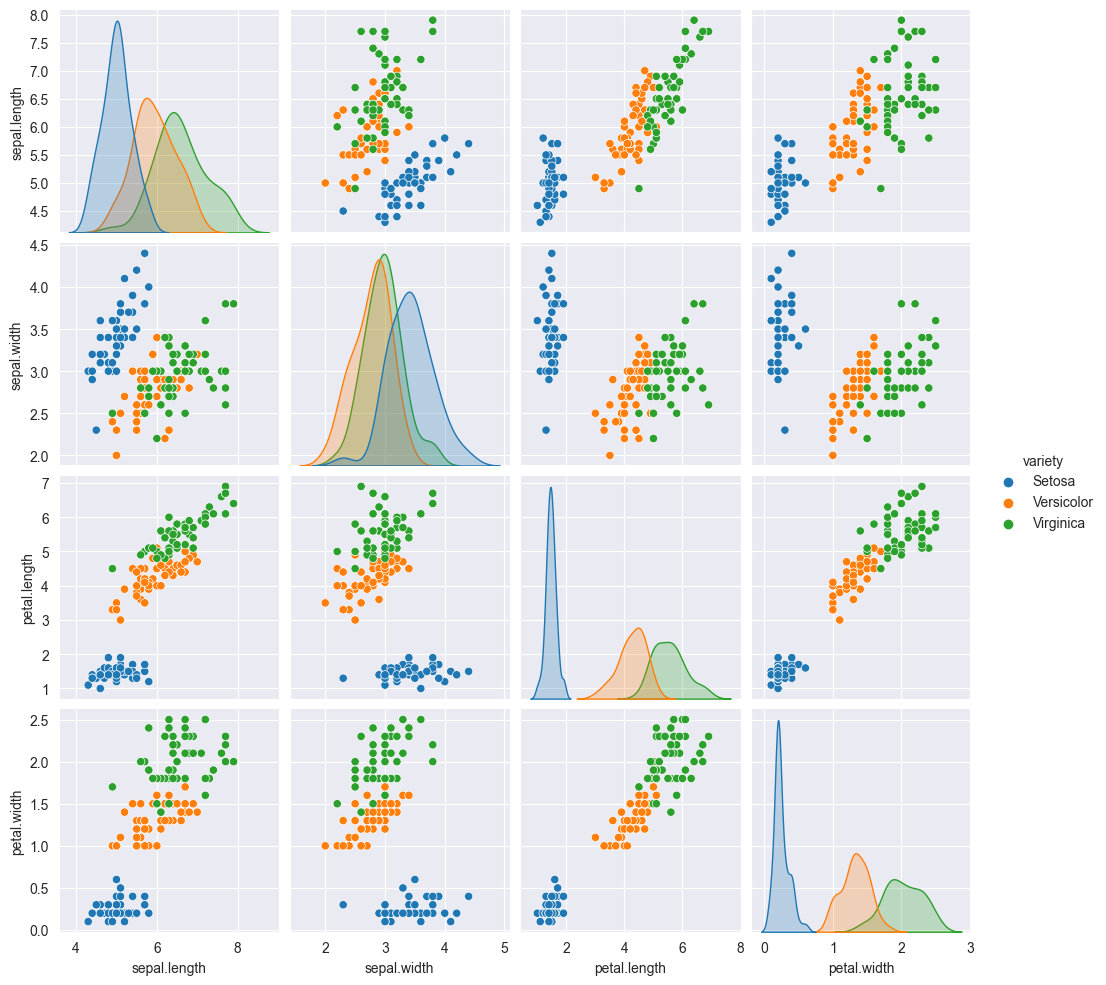

In [19]:
# show data information
df
df.describe()
sns.pairplot(df, hue='variety')

C:\Users\cosyt\AppData\Local\Temp\ipykernel_16028\1536326880.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("variety", 1)


Text(0.5, 1.0, 'Correlation matrix')

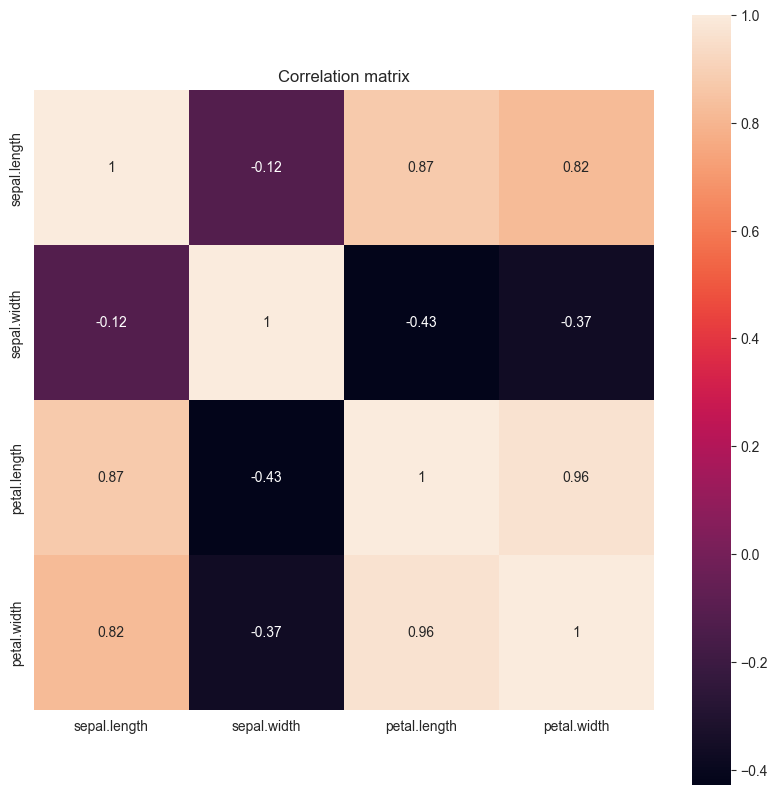

In [20]:
# We're seperating the species column
species = df["variety"].tolist()
X = df.drop("variety", 1)
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(X_corr, vmax=1, square=True, annot=True)
plt.title('Correlation matrix')

In [21]:
u, s, v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

Text(0.5, 0, 'Dimensions')

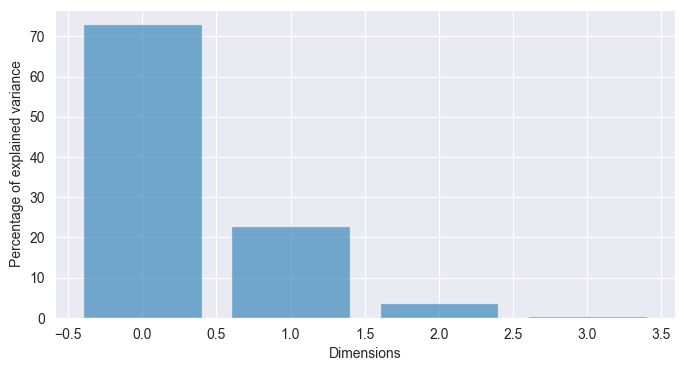

In [22]:
# plotting the variance explained by each PC
explained_variance = (eig_values / np.sum(eig_values)) * 100
plt.figure(figsize=(8, 4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [23]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:, 0])
pc2 = X.dot(eig_vectors[:, 1])

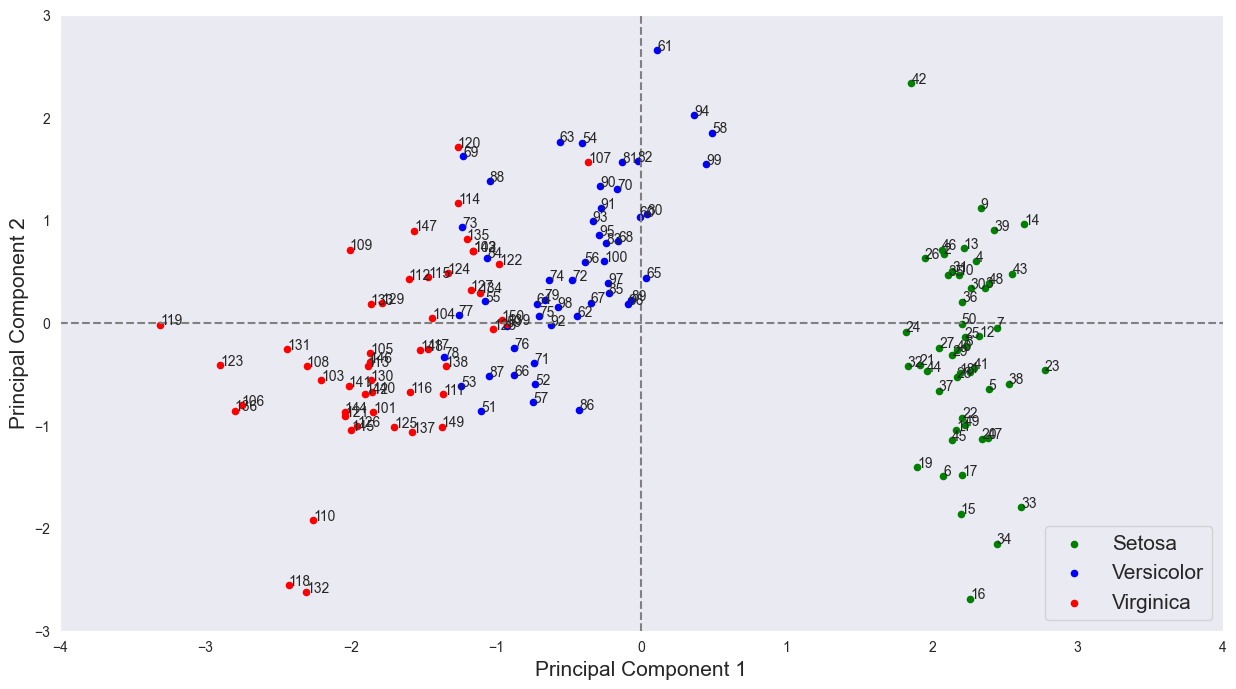

In [24]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r", "b", "g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label=spec, s=20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i + 1), (pc1[i], pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()


plot_scatter(pc1, pc2)

C:\Users\cosyt\AppData\Local\Temp\ipykernel_16028\2986376054.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("variety", 1)


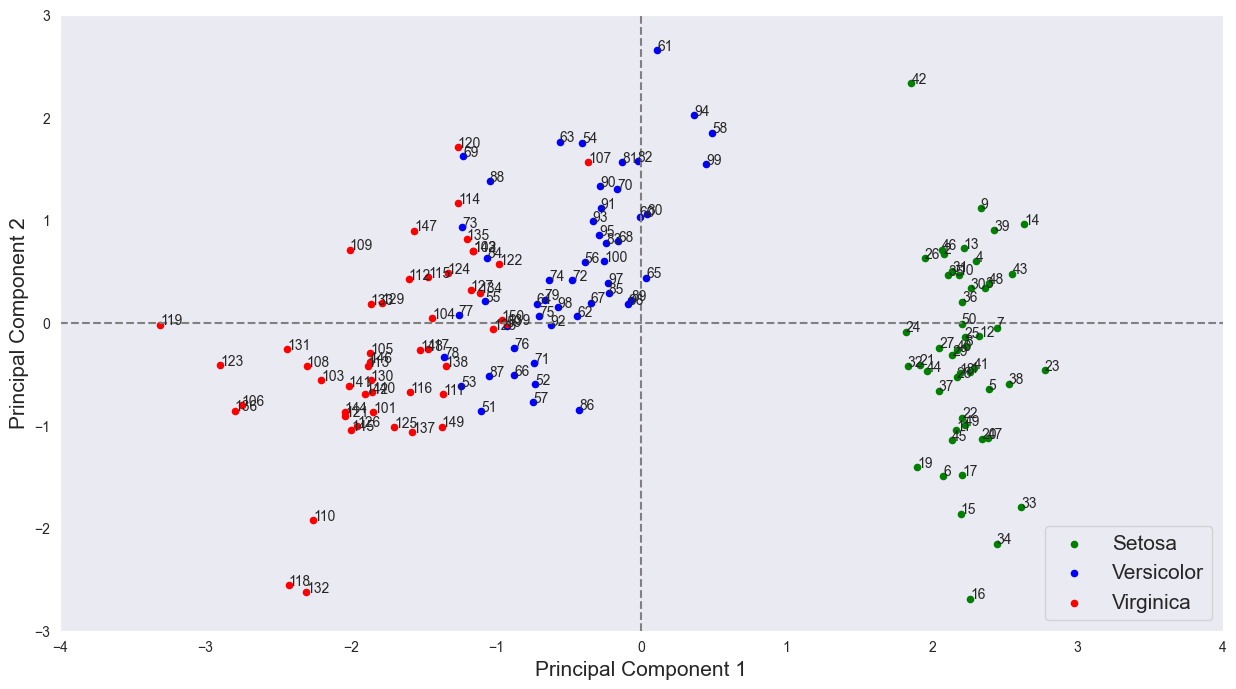

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read csv data file, change to your location
df = pd.read_csv("ex5Data/iris.csv")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop("variety", 1)
X = StandardScaler().fit_transform(X)
pca = PCA()
result = pca.fit_transform(X)
# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:, 0]
pc2 = - result[:, 1]
plot_scatter(pc1, pc2)

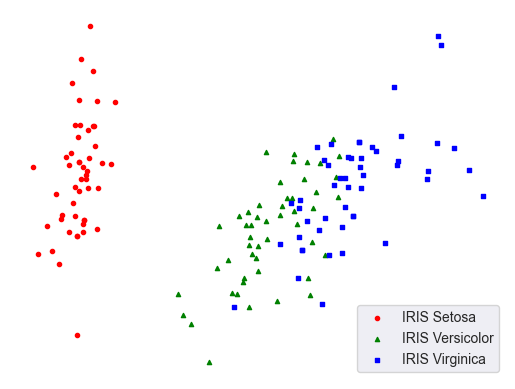

In [26]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#Chú ý bài này không sử dụng data iris có sẵn mà cần import từ file, do đó cần xử lý dữ liệu sao cho đúng với yêu cầu đề bài
iris = pd.read_csv("ex5Data/iris.csv")
X = iris.iloc[:, 0:3]  # we take full 4 features
Y = iris.iloc[:, -1]
# Normalize data
X_norm = (X - X.min()) / (X.max() - X.min())
pca = sklearnPCA(n_components=2)  #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y == 'Setosa'][0], transformed[Y == 'Setosa'][1], s=9, label='IRIS Setosa', c='red')
plt.scatter(transformed[Y == 'Versicolor'][0], transformed[Y == 'Versicolor'][1], s=9, label='IRIS Versicolor',
            c='green', marker="^")
plt.scatter(transformed[Y == 'Virginica'][0], transformed[Y == 'Virginica'][1], s=9, label='IRIS Virginica', c='blue',
            marker="s")
plt.legend()
plt.show()

In [27]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = pd.read_csv("ex5Data/iris.csv", header=0)
X = iris.iloc[:, 0:3]  # we take full 4 features
Y = iris.iloc[:, -1]
dict = {"Setosa": 0, "Versicolor": 1, "Virginica": 2}
Y = Y.replace(dict)
X = np.concatenate((np.ones((1, X.shape[0])), X.T), axis=0).T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

log = linear_model.LogisticRegression(multi_class="multinomial")

log.fit(X_train, Y_train)
#đoạn này chưa hiểu đề bài yêu cầu so sánh cái gì

y_pred = log.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred))

Accuracy:  0.9666666666666667


c:\users\cosyt\pycharmprojects\mlbasic\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
#Ví dụ 2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv("ex5Data/pd_speech_features.csv")
df.head()
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [29]:
X = df.iloc[:, 1:753]
Y = df.iloc[:, 0]
pca = PCA(n_components=200)
X_norm = (X - X.min()) / (X.max() - X.min())
tranformed = pd.DataFrame(pca.fit_transform(X_norm))
X_train, X_test, Y_train, Y_test = train_test_split(tranformed, Y, train_size=500)
log = LogisticRegression(multi_class="multinomial")

log.fit(X_train, Y_train)
Y_pred = log.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Accuracy:  0.4921875


In [30]:
#Bài 3
import os
import numpy as np

# set names to the paths because they're too long
data_path = 'ex4Data/'
#path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')


def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip  # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path, 'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size, )
    # Read labels
    f_labels = gzip.open(labels_path, 'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels


images, labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
print(images.shape, labels.shape)

(5000, 784) (5000,)


In [31]:
pca = PCA(n_components=100)
X_reduced = pca.fit_transform(images)

In [32]:
import timeit

#Dữ liệu chưa giảm chiều
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, train_size=0.7)
log = LogisticRegression(multi_class="multinomial")
begin = timeit.default_timer()
log.fit(X_train, Y_train)
Y_pred = log.predict(X_test)
stop = timeit.default_timer()
time = stop - begin
print("Time: ", time, "seconds")
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Time:  1.0812240000086604 seconds
Accuracy:  0.872


In [33]:
#Dữ liệu đã qua giảm chiều
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, labels, train_size=0.7)
log = LogisticRegression(multi_class="multinomial")

begin = timeit.default_timer()
log.fit(X_train, Y_train)
Y_pred = log.predict(X_test)
stop = timeit.default_timer()
time = stop - begin
print("Time: ", time, "seconds")
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Time:  0.31875839999702293 seconds
Accuracy:  0.856
